In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist_df = pd.DataFrame(mnist.data[:10000], columns=mnist.feature_names)
mnist_df["target"] = mnist.target[:10000]
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [6]:
mnist_df.to_csv("mnist_784.csv")

In [7]:
data , target = shuffle(mnist.data, mnist.target)

In [8]:
data = data[:10000]
target = target[:10000]

In [9]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
53744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


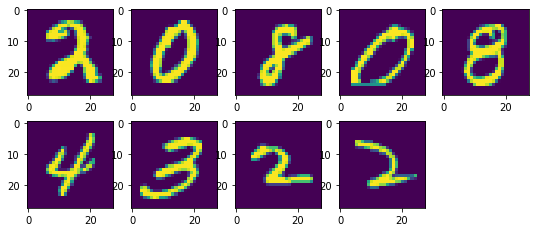

In [10]:
plt.figure(figsize=(9, 10))

for i in range(9):
    plt.subplot(int('55'+ str(i+1)))
    plt.imshow(data.iloc[i].values.reshape(28,28))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_predict = knn_clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       235
           1       0.92      1.00      0.96       287
           2       0.98      0.92      0.95       275
           3       0.91      0.95      0.93       264
           4       0.96      0.91      0.93       256
           5       0.91      0.92      0.92       206
           6       0.99      0.98      0.99       256
           7       0.94      0.96      0.95       262
           8       0.99      0.86      0.92       231
           9       0.92      0.89      0.91       228

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



In [19]:
confusion_matrix(y_test, y_predict)

array([[234,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 287,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,   5, 253,   0,   0,   1,   0,   5,   1,   1],
       [  0,   2,   0, 250,   0,   8,   0,   2,   1,   1],
       [  4,   6,   1,   0, 234,   0,   0,   1,   0,  10],
       [  3,   0,   0,   9,   1, 190,   2,   1,   0,   0],
       [  1,   1,   0,   0,   0,   2, 252,   0,   0,   0],
       [  1,   4,   0,   1,   2,   0,   0, 252,   0,   2],
       [  3,   4,   3,   9,   1,   7,   1,   1, 199,   3],
       [  2,   4,   0,   5,   7,   0,   0,   6,   0, 204]])